In [9]:
#video display

import cv2
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    #frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
#temporal subtraction simple

import cv2
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
cur_frame, prev_frame = None, None
while True:
    ret, frame = cap.read()
    prev_frame = cur_frame
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    if prev_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , prev_frame)
        cv2.imshow('temporal subtraction', sub_frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

## %%writefile test
## Practice
1. Perform <b>Temporal Subtraction</b>. i.e., <i>abs(I(t)-I(t-1))</i> where <i>I(t)</i> is the captured image at time instant <i>t</i>.
2. Perform <b>Background Subtraction</b>. i.e., <i>abs(I(t)-I(0))</i> where <i>I(0)</i> is the first captured image after your program starts the execution.
3. Show the background image and both subtracted images.
4. Compare the differences. What is the pros and cons of these two methods?
5. Upload your Jupyter code file (*.ipynb)

In [9]:
#motion history image

import cv2
alpha = 1.3
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
ret, frame = cap.read()
cur_frame = mhi_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
while True:
    ret, frame = cap.read()
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    
    mhi_frame = cv2.addWeighted(mhi_frame, alpha, cur_frame, 1-alpha, 0)
    #cv2.imshow('motion history image', mhi_frame)


    prev_frame = mhi_frame
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    if prev_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , prev_frame)
        cv2.imshow('temporal subtraction', sub_frame)

    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

## %%writefile test
## Homework 1
1. Perform <b>Adaptive Background Subtraction</b>. i.e., <i>S(t)=abs(I(t)-B(t))</i> where <i>B(t)</i> is the adaptive background image.
2. Perform <b>Foreground Detection</b>. i.e., <i>F(t)=I(t) if S(t) > Threshold</i>
3. Show the captured image <i>I(t)</i>, the adaptive background image <i>B(t)</i>, the subtracted image <i>S(t)</i>, and the foreground image <i>F(t)</i>.
4. Adjust the alpha value and observe the result.
5. Any idea on how to generate a better Adaptive Background Image? Try it and compare the results.
6. Write down your observation and comparison at the end of your code by adding an individual cell in Jupyter.
7. Upload your Jupyter code file (*.ipynb)
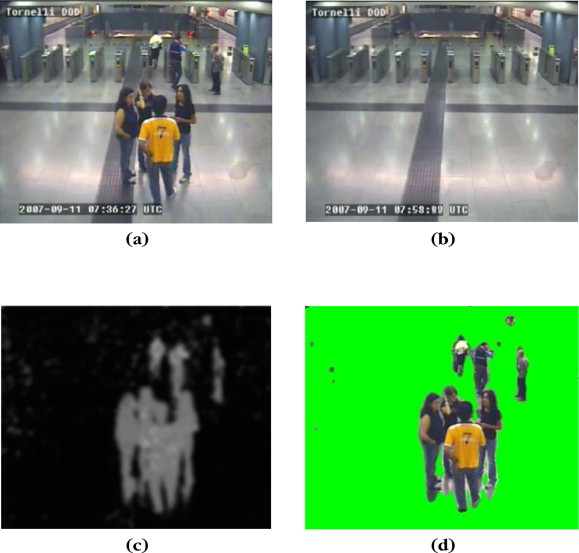